# Example notebook

In this notebook we shall demonstrate how pyro simulations can be set up and run in the notebook.

In [1]:
from pyro import Pyro

First we need to set up our problem. To do this, we choose which solver we want to use (`advection`), which problem we want to solve (`smooth`) and the name of a parameter file we want to use (`inputs.smooth`). 

In [2]:
solver = "advection"
problem_name = "smooth"
param_file = "inputs.smooth"

Next, we need to create the `Pyro` object and initialize the problem.

In [3]:
pyro_sim = Pyro(solver)
pyro_sim.initialize_problem(problem_name, inputs_file=param_file)

At this point, we can print out some of the problem properties.

In [4]:
print(pyro_sim)

Solver = advection
Problem = smooth
Simulation time = 0.0
Simulation step number = 0

Runtime Parameters
------------------
advection.limiter = 2
advection.u = 1.0
advection.v = 1.0
driver.cfl = 0.8
driver.fix_dt = -1.0
driver.init_tstep_factor = 1.0
driver.max_dt_change = 1e+33
driver.max_steps = 500
driver.tmax = 1.0
driver.verbose = 0
io.basename = smooth_
io.do_io = 0
io.dt_out = 0.2
io.force_final_output = 0
io.n_out = 10000
mesh.grid_type = Cartesian2d
mesh.nx = 32
mesh.ny = 32
mesh.xlboundary = periodic
mesh.xmax = 1.0
mesh.xmin = 0.0
mesh.xrboundary = periodic
mesh.ylboundary = periodic
mesh.ymax = 1.0
mesh.ymin = 0.0
mesh.yrboundary = periodic
particles.do_particles = 1
particles.n_particles = 100
particles.particle_generator = grid
vis.dovis = 0
vis.store_images = 0



We can also plot the initial data by calling `dovis` on the object's `sim` variable.

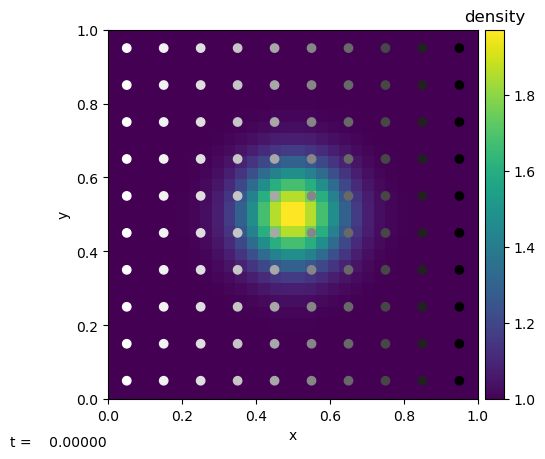

<Figure size 640x480 with 0 Axes>

In [5]:
pyro_sim.sim.dovis()

Let's evolve the problem by a single timestep by calling `single_step`. This will evolve the simulation and produce an updated plot of the data (unless the problem's `vis.dovis` parameter has been set to false). Let's try that a couple of times.

In [6]:
pyro_sim.single_step()

In [7]:
pyro_sim.single_step()

Alternatively, we can run the entire simulation (i.e. run until the time reaches the `driver.tmax` parameter or the number of steps reaches `driver.max_steps`). Let's reinitialize the problem and try that. This time, we shall pass in the extra parameter `vis.dovis = False` in order to suppress plotting at each timestep. We'll also shrink down the number of gridpoints in each direction and turn off the particles.

In [8]:
# NBVAL_IGNORE_OUTPUT 
extra_parameters = {'vis.dovis': False, 'mesh.nx': 8, 'mesh.ny':8, 'particles.do_particles': False}
pyro_sim.initialize_problem(problem_name, inputs_file=param_file, inputs_dict=extra_parameters)
pyro_sim.run_sim;

We can now plot the final data by calling `dovis` again

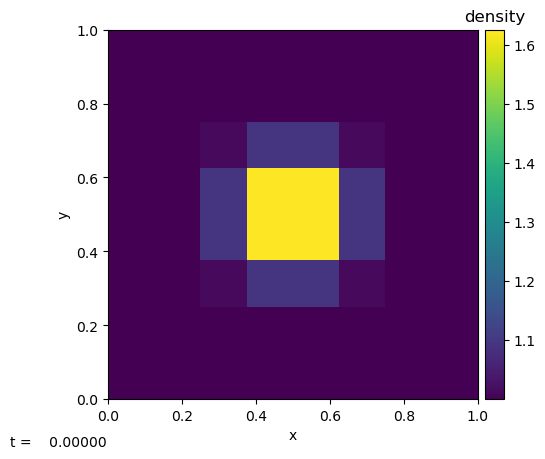

<Figure size 640x480 with 0 Axes>

In [9]:
pyro_sim.sim.dovis()

We can extract the simulation data using the `get_var` function. Let's do that for the density.

In [10]:
dens = pyro_sim.get_var("density")

In [11]:
# NBVAL_IGNORE_OUTPUT 
print(dens)

[[1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.         1.00000003
  1.00000125 1.00000814 1.00000814 1.00000125 1.00000003 1.
  1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.00000003 1.00000814
  1.00034611 1.00225693 1.00225693 1.00034611 1.00000814 1.00000003
  1.         1.      

This can be printed in a slightly more human-readable format by using `pretty_print`

In [12]:
dens.pretty_print(show_ghost=False)

         1         1         1         1         1         1         1         1 
         1         1    1.0003    1.0023    1.0023    1.0003         1         1 
         1    1.0003    1.0147     1.096     1.096    1.0147    1.0003         1 
         1    1.0023     1.096    1.6258    1.6258     1.096    1.0023         1 
         1    1.0023     1.096    1.6258    1.6258     1.096    1.0023         1 
         1    1.0003    1.0147     1.096     1.096    1.0147    1.0003         1 
         1         1    1.0003    1.0023    1.0023    1.0003         1         1 
         1         1         1         1         1         1         1         1 

         ^ y
         |
         +---> x
        
